# Project 2 - Healthcare

Problem Statement

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	                Description

Pregnancies	                Number of times pregnant
Glucose	                    Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	            Diastolic blood pressure (mm Hg)
SkinThickness	            Triceps skinfold thickness (mm)
Insulin	                    Two hour serum insulin
BMI	                        Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	                        Age in years
Outcome	                    Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

Project Task: Week 1

Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

Project Task: Week 2

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

Project Task: Week 3

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

Week 1 - Data Exploration

In [2]:
dataset = pd.read_csv('health care diabetes.csv')

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

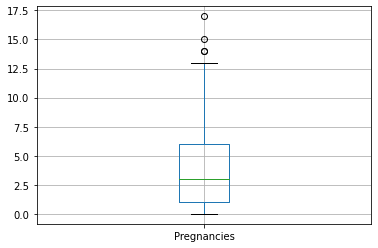

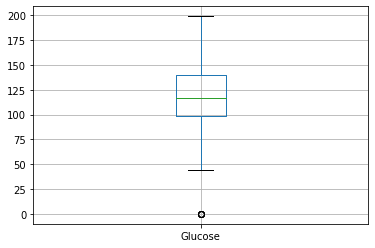

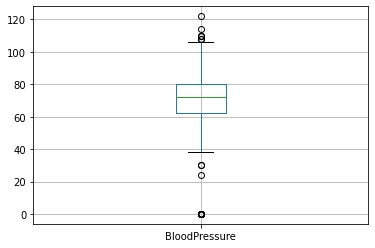

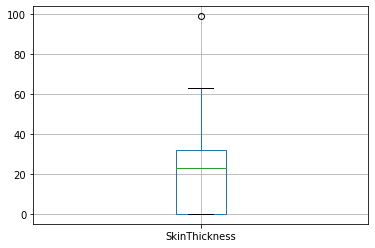

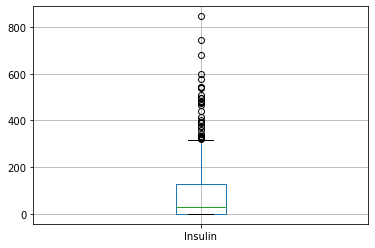

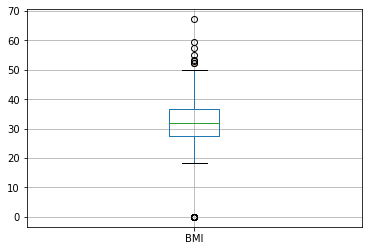

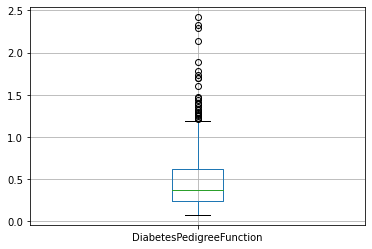

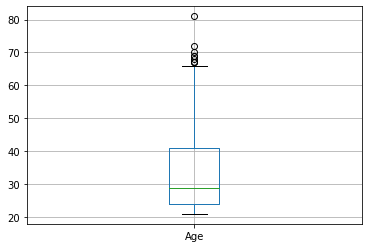

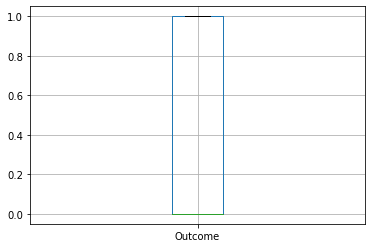

In [9]:
for column in dataset:
    plt.figure()
    dataset.boxplot([column])

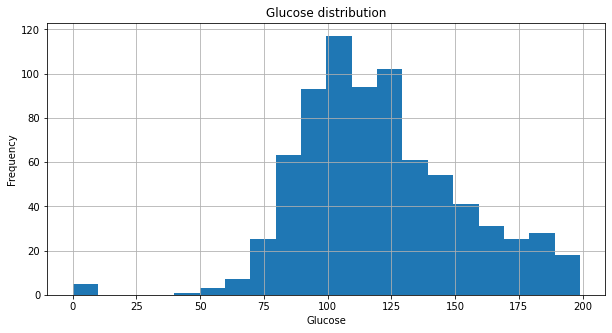

In [10]:
plt.figure(figsize=(10,5))
dataset['Glucose'].hist(bins=20)
plt.title('Glucose distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

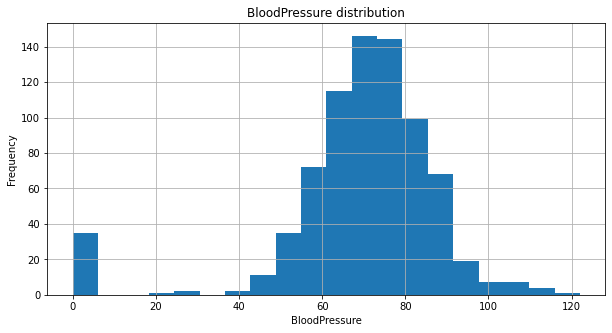

In [11]:
plt.figure(figsize=(10,5))
dataset['BloodPressure'].hist(bins=20)
plt.title('BloodPressure distribution')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

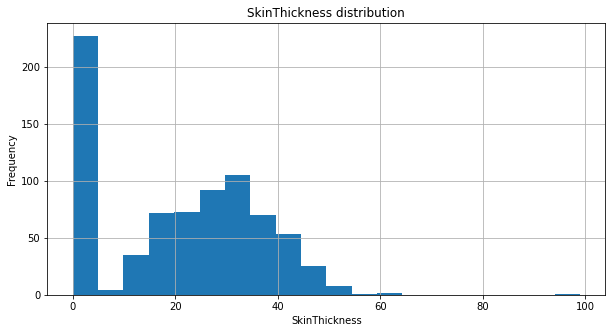

In [12]:
plt.figure(figsize=(10,5))
dataset['SkinThickness'].hist(bins=20)
plt.title('SkinThickness distribution')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

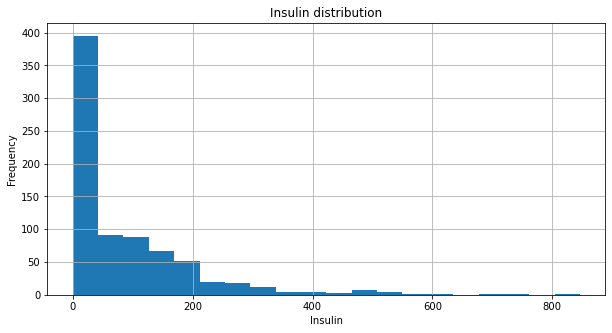

In [13]:
plt.figure(figsize=(10,5))
dataset['Insulin'].hist(bins=20)
plt.title('Insulin distribution')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

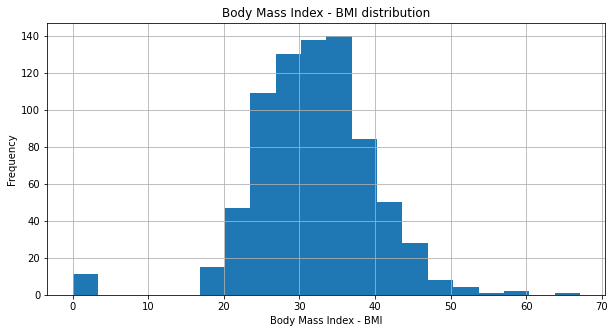

In [14]:
plt.figure(figsize=(10,5))
dataset['BMI'].hist(bins=20)
plt.title('Body Mass Index - BMI distribution')
plt.xlabel('Body Mass Index - BMI')
plt.ylabel('Frequency')
plt.show()

In [15]:
dataset['Glucose'].value_counts()

99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64

In [16]:
dataset['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64

In [17]:
dataset['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
18     20
28     20
33     20
31     19
19     18
39     18
29     17
40     16
37     16
22     16
25     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
13     11
42     11
21     10
46      8
34      8
12      7
38      7
11      6
45      6
16      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
52      2
8       2
7       2
51      1
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

In [18]:
dataset['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
193      1
191      1
188      1
184      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [19]:
dataset['BMI'].value_counts()

32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
        ..
19.3     1
49.3     1
19.4     1
20.0     1
40.1     1
Name: BMI, Length: 248, dtype: int64

Week 2 - Data Exploration

In [20]:
df_glucose = dataset['Glucose'].value_counts().to_frame()

In [21]:
df_glucose.head()

,Glucose
99,17
100,17
129,14
125,14
106,14


In [22]:
df_glucose.shape

(136, 1)

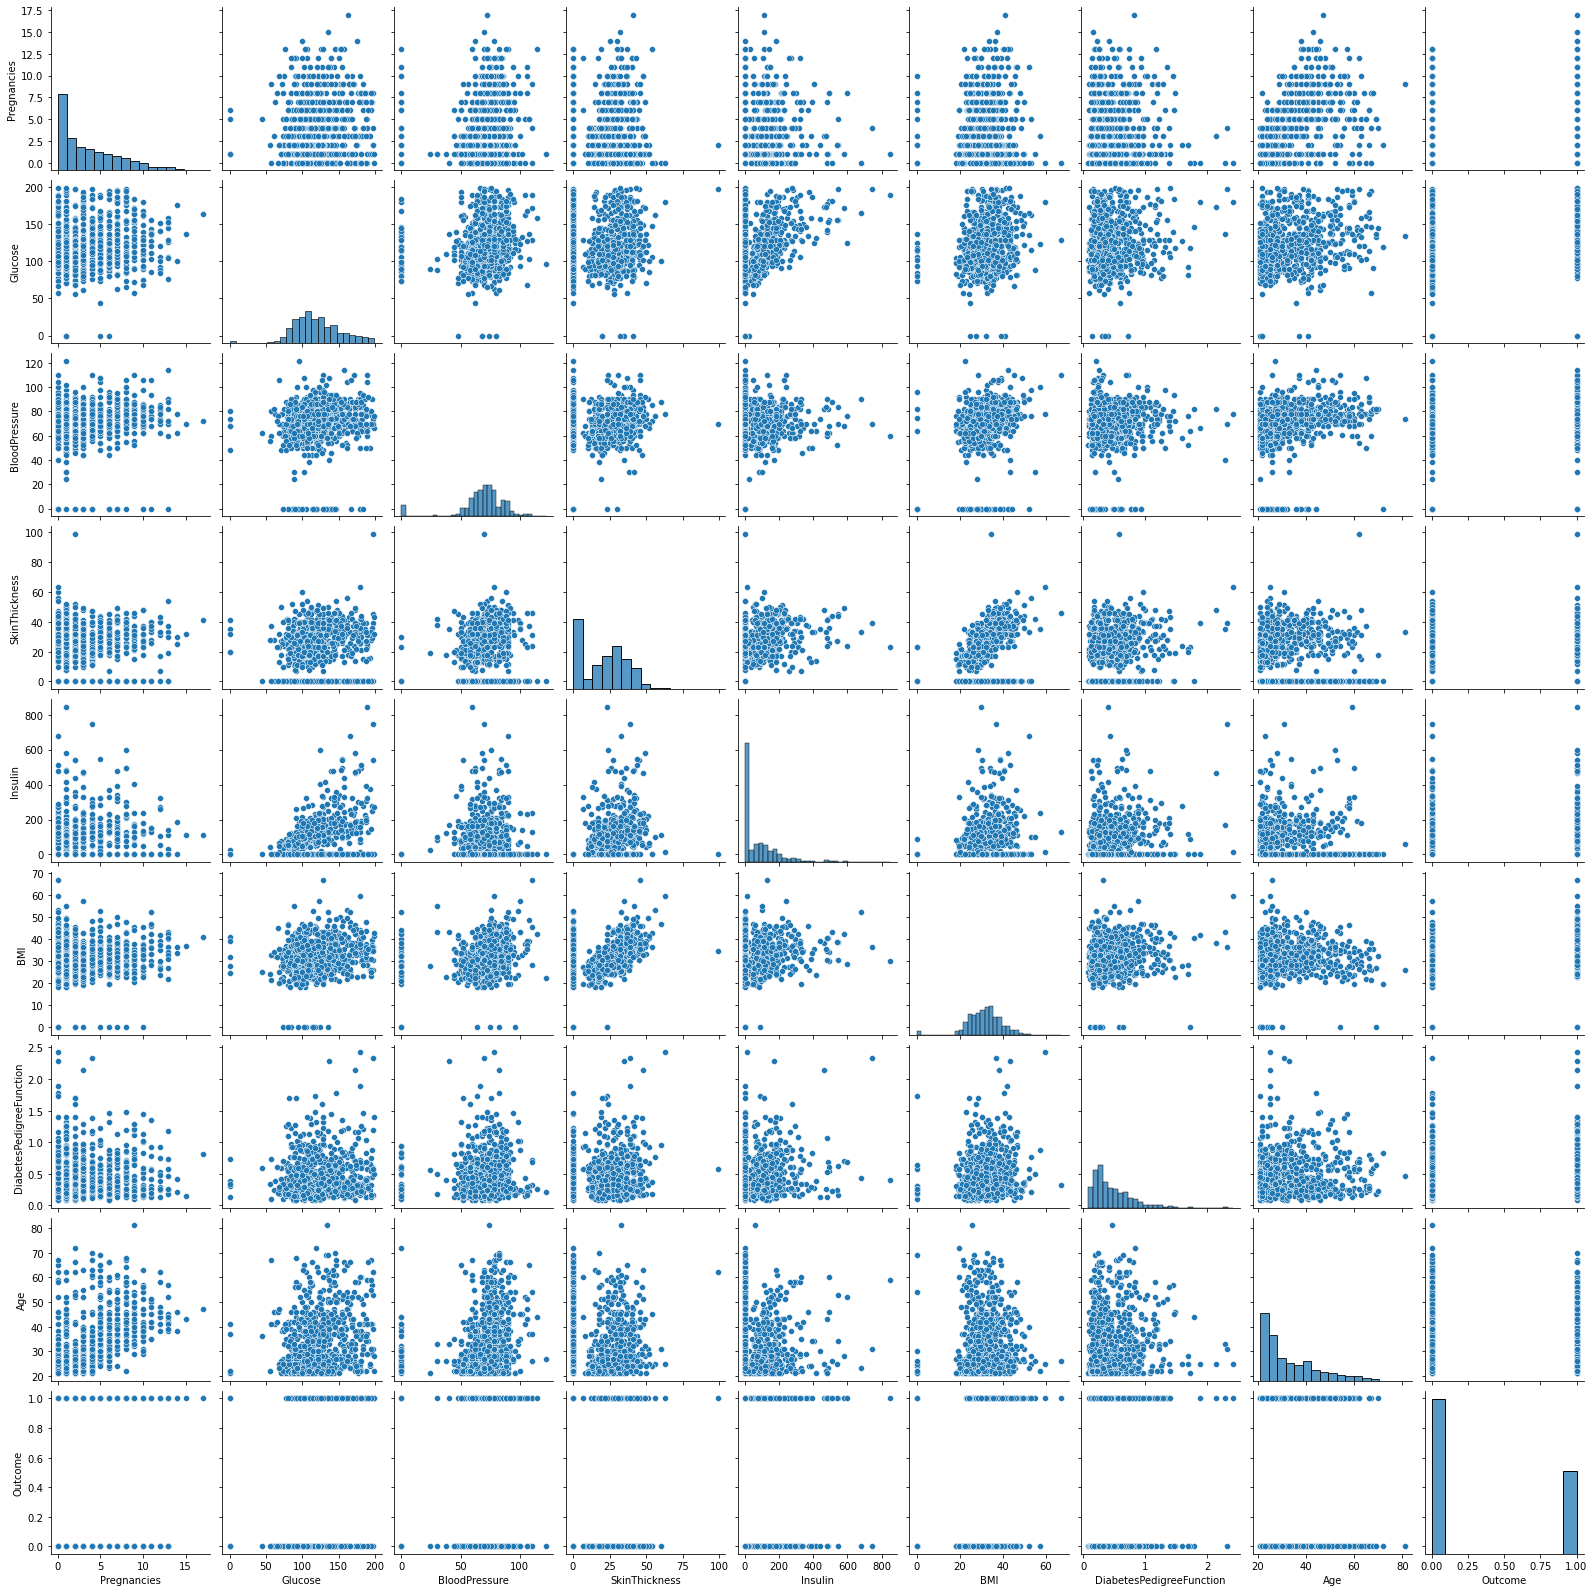

In [23]:
sns.pairplot(dataset)

Text(0, 0.5, 'Count')

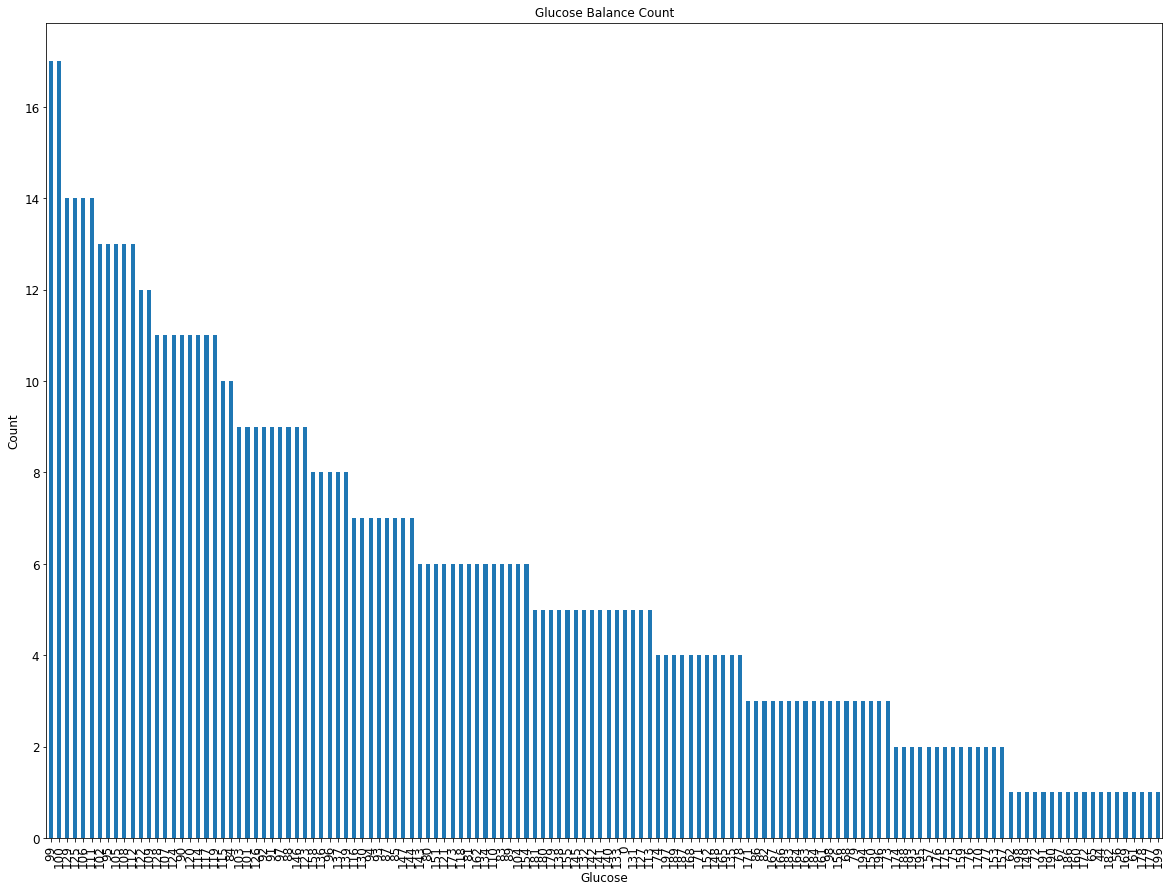

In [24]:
ax = df_glucose.plot(kind='bar', title ="Glucose Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("Glucose",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

In [25]:
df_bloodpressure = dataset['BloodPressure'].value_counts().to_frame()

Text(0, 0.5, 'Count')

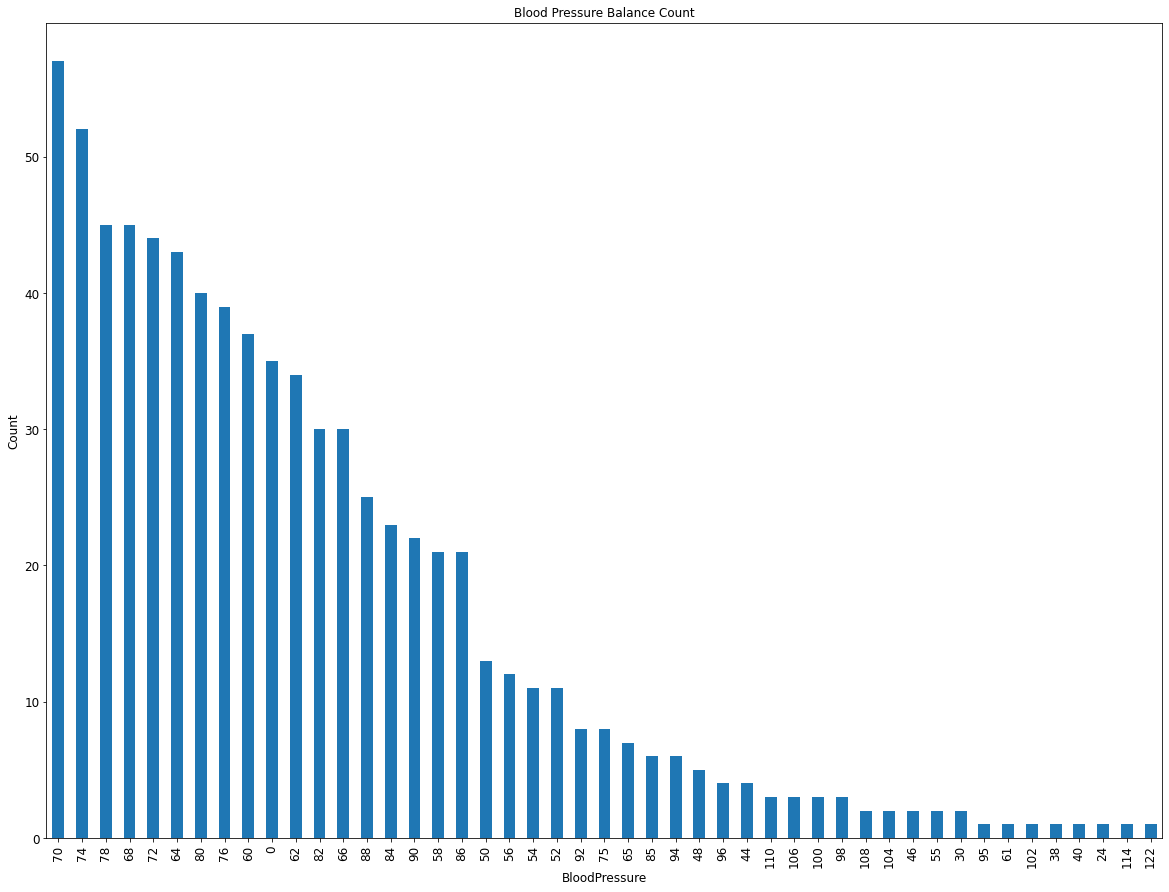

In [26]:
ax = df_bloodpressure.plot(kind='bar', title ="Blood Pressure Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("BloodPressure",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

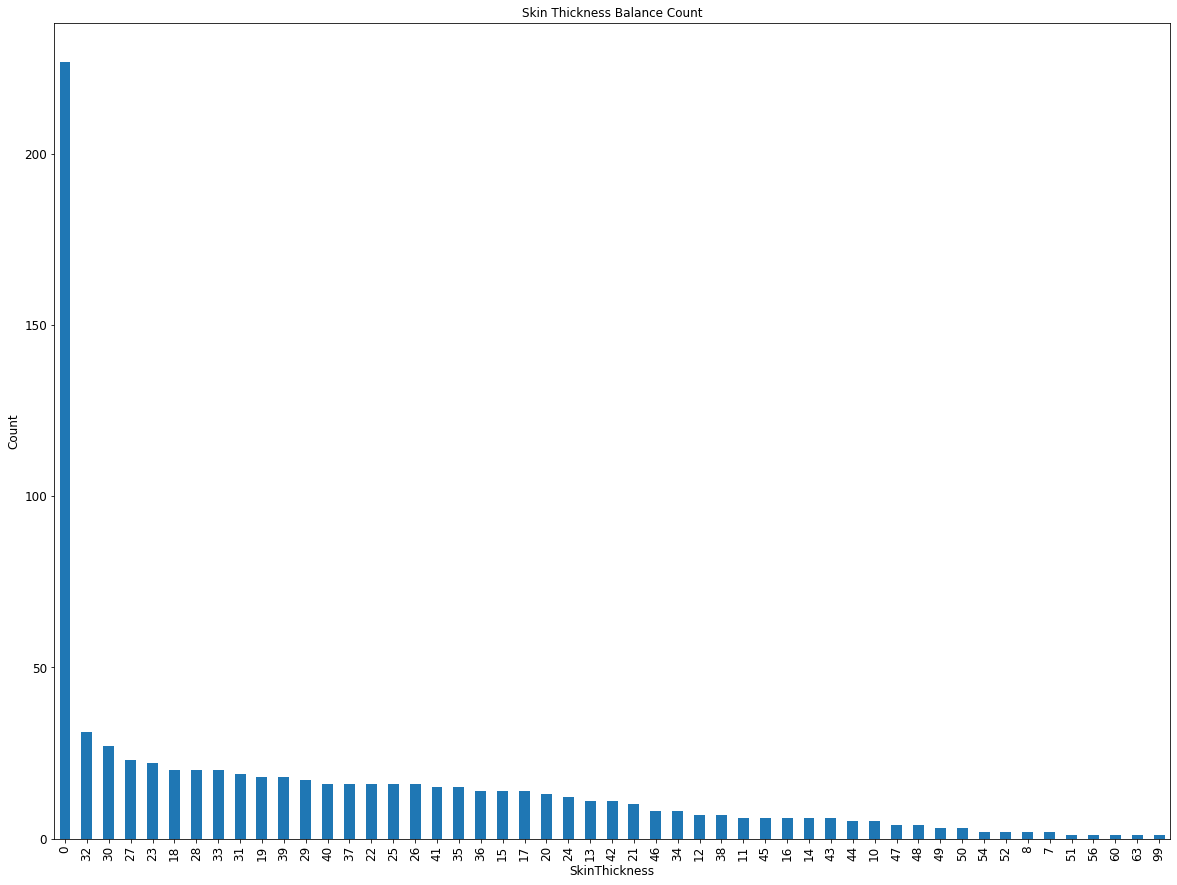

In [27]:
df_SkinThickness = dataset['SkinThickness'].value_counts().to_frame()
ax = df_SkinThickness.plot(kind='bar', title ="Skin Thickness Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("SkinThickness",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

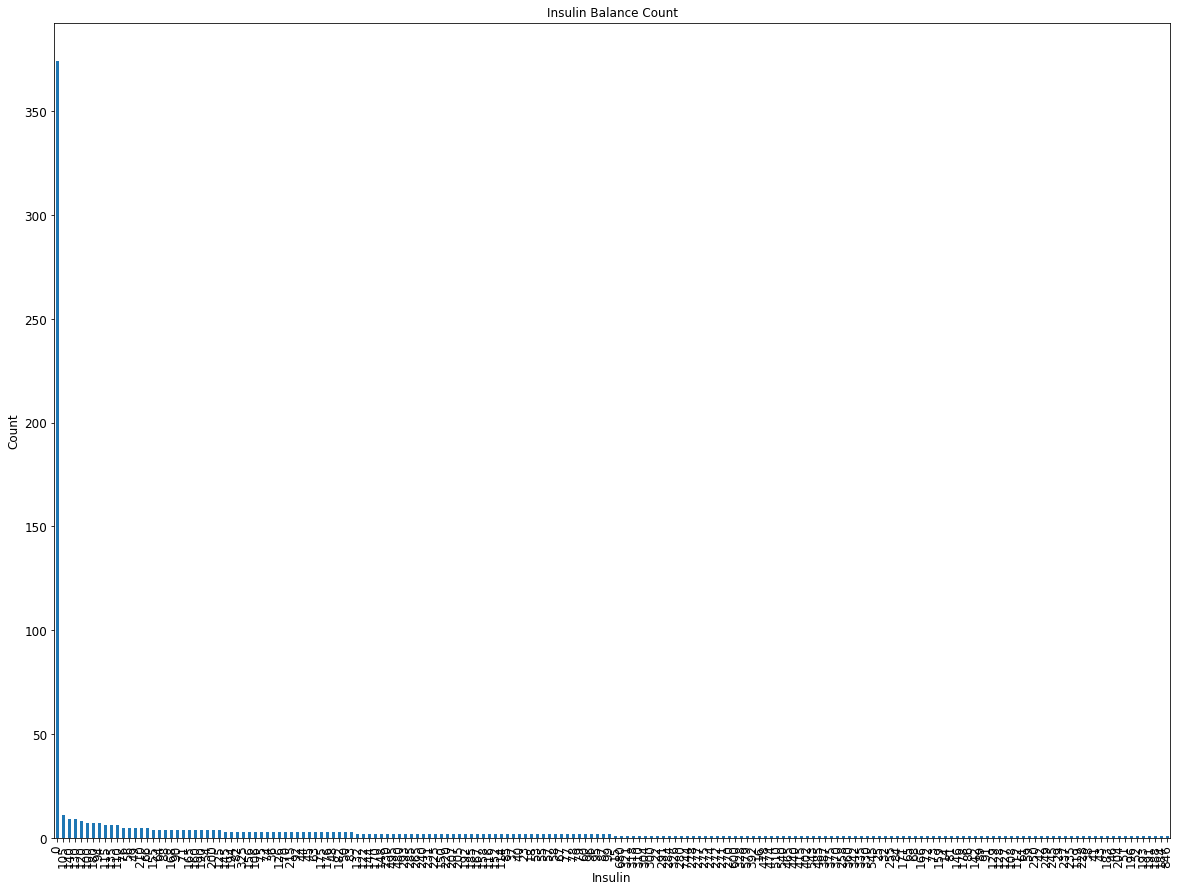

In [28]:
df_insulin = dataset['Insulin'].value_counts().to_frame()
ax = df_insulin.plot(kind='bar', title ="Insulin Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("Insulin",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

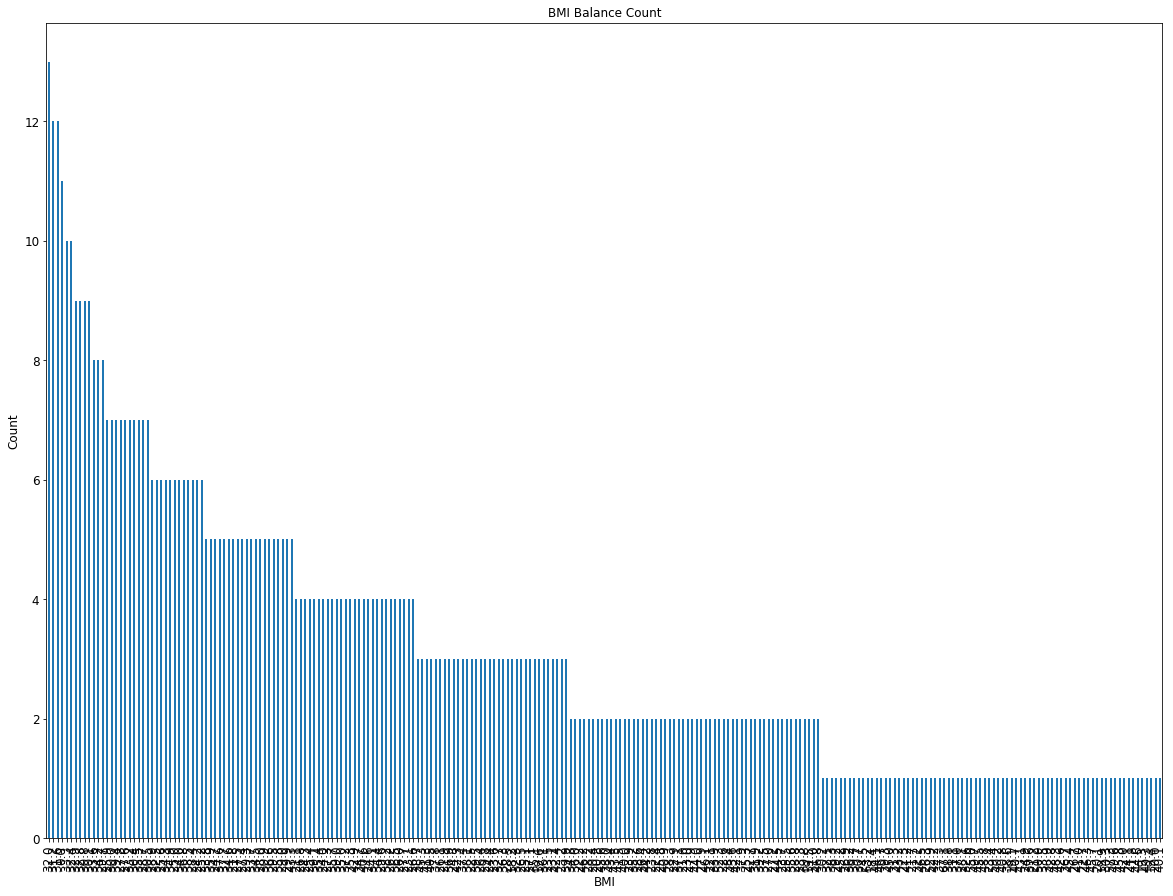

In [29]:
df_bmi = dataset['BMI'].value_counts().to_frame()
ax = df_bmi.plot(kind='bar', title ="BMI Balance Count",figsize=(20,15),legend=False, fontsize=12)
ax.set_xlabel("BMI",fontsize=12)
ax.set_ylabel("Count",fontsize=12)

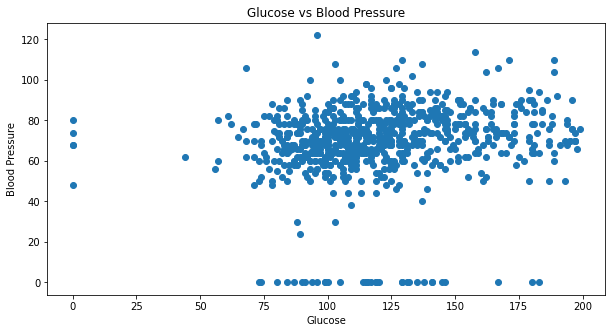

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(dataset.Glucose,dataset.BloodPressure)
plt.title('Glucose vs Blood Pressure')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()

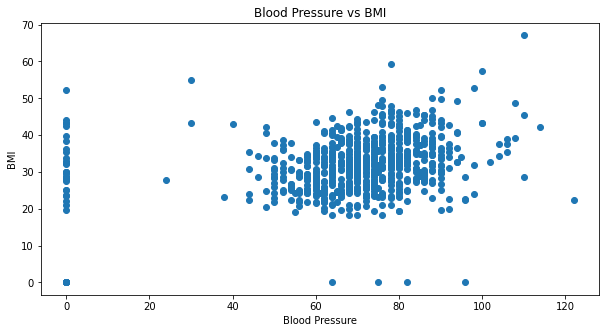

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(dataset.BloodPressure,dataset.BMI)
plt.title('Blood Pressure vs BMI')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()

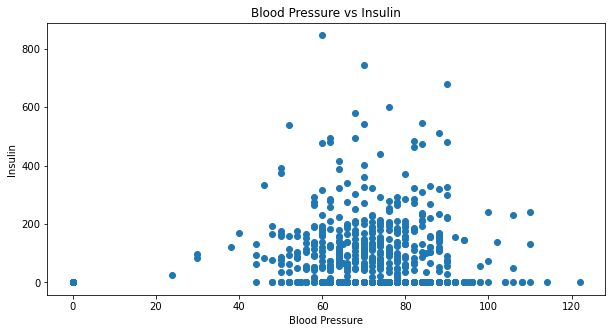

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(dataset.BloodPressure,dataset.Insulin)
plt.title('Blood Pressure vs Insulin')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.show()

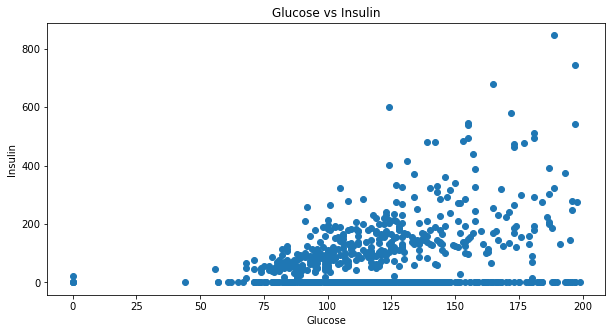

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(dataset.Glucose,dataset.Insulin)
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

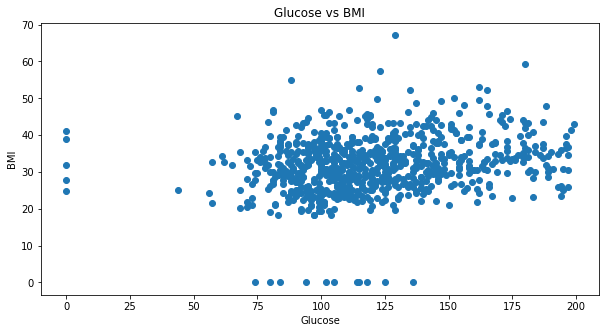

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(dataset.Glucose,dataset.BMI)
plt.title('Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

<AxesSubplot:>

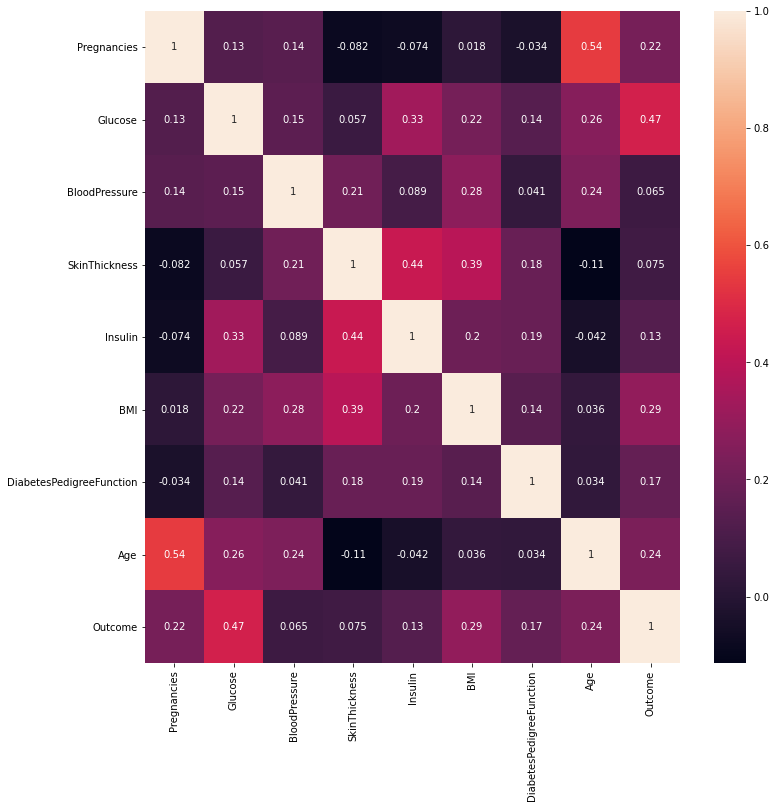

In [35]:
plt.subplots(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True)

In [36]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Week 3 - Data Modeling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [38]:
features = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
label = dataset.iloc[:,8].values

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(features,label,train_size=0.8,random_state =40)

In [40]:
modelLR = LogisticRegression()
modelLR.fit(X_train,Y_train)

LogisticRegression()

In [41]:
confmatrix = confusion_matrix(label,modelLR.predict(features))
confmatrix

array([[446,  54],
       [118, 150]], dtype=int64)

In [42]:
modelLR.score(X_train,Y_train)

0.7785016286644951

In [43]:
modelLR.score(X_test,Y_test)

0.7662337662337663

In [44]:
print(classification_report(label,modelLR.predict(features)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



AUC: 0.838


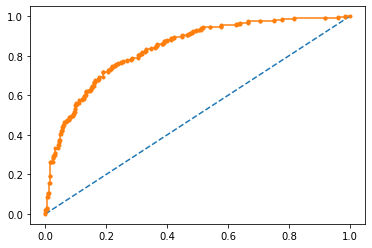

In [45]:
probs = modelLR.predict_proba(features)
probs = probs[:, 1]
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [46]:
modelDTC = DecisionTreeClassifier(max_depth=5)
modelDTC.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
confmatrix1 = confusion_matrix(label,modelDTC.predict(features))
confmatrix1

array([[451,  49],
       [ 79, 189]], dtype=int64)

In [48]:
modelDTC.score(X_train,Y_train)

0.8452768729641694

In [49]:
modelDTC.score(X_test,Y_test)

0.7857142857142857

In [50]:
print(classification_report(label,modelDTC.predict(features)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       500
           1       0.79      0.71      0.75       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



AUC: 0.902


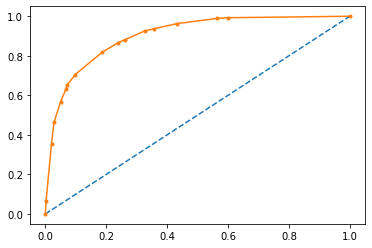

In [51]:
probs1 = modelDTC.predict_proba(features)
probs1 = probs1[:, 1]
auc = roc_auc_score(label, probs1)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [52]:
modelRFC = RandomForestClassifier(n_estimators=11)
modelRFC.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=11)

In [53]:
confmatrix2 = confusion_matrix(label,modelRFC.predict(features))
confmatrix2

array([[485,  15],
       [ 34, 234]], dtype=int64)

In [54]:
modelRFC.score(X_train,Y_train)

0.9837133550488599

In [55]:
modelRFC.score(X_test,Y_test)

0.7467532467532467

In [56]:
print(classification_report(label,modelRFC.predict(features)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       500
           1       0.94      0.87      0.91       268

    accuracy                           0.94       768
   macro avg       0.94      0.92      0.93       768
weighted avg       0.94      0.94      0.94       768



AUC: 0.979


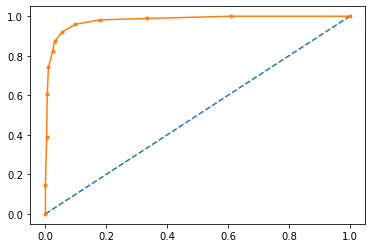

In [57]:
probs2 = modelRFC.predict_proba(features)
probs2 = probs2[:, 1]
auc = roc_auc_score(label, probs2)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [58]:
modelSVC = SVC(gamma='auto')
modelSVC.fit(X_train,Y_train)

SVC(gamma='auto')

In [59]:
confmatrix3 = confusion_matrix(label,modelSVC.predict(features))
confmatrix3

array([[500,   0],
       [ 59, 209]], dtype=int64)

In [60]:
modelSVC.score(X_train,Y_train)

1.0

In [61]:
modelSVC.score(X_test,Y_test)

0.6168831168831169

In [62]:
print(classification_report(label,modelSVC.predict(features)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       500
           1       1.00      0.78      0.88       268

    accuracy                           0.92       768
   macro avg       0.95      0.89      0.91       768
weighted avg       0.93      0.92      0.92       768



In [63]:
modelKNN = KNeighborsClassifier(n_neighbors=16, weights='uniform', algorithm='auto', 
                                leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
modelKNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16)

In [64]:
confmatrix4 = confusion_matrix(label,modelKNN.predict(features))
confmatrix4

array([[456,  44],
       [136, 132]], dtype=int64)

In [65]:
modelKNN.score(X_train,Y_train)

0.7671009771986971

In [66]:
modelKNN.score(X_test,Y_test)

0.7597402597402597

In [67]:
print(classification_report(label,modelKNN.predict(features)))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       500
           1       0.75      0.49      0.59       268

    accuracy                           0.77       768
   macro avg       0.76      0.70      0.71       768
weighted avg       0.76      0.77      0.75       768



AUC: 0.833


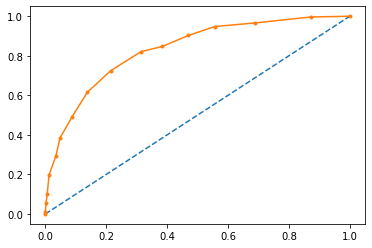

In [68]:
probs4 = modelKNN.predict_proba(features)
probs4 = probs4[:, 1]
auc = roc_auc_score(label, probs4)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(label, probs4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

Minimum error:- 0.23376623376623376 at K = 16


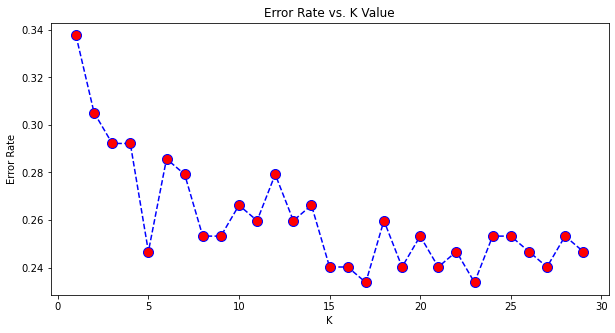

In [69]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7662337662337663 at K = 16


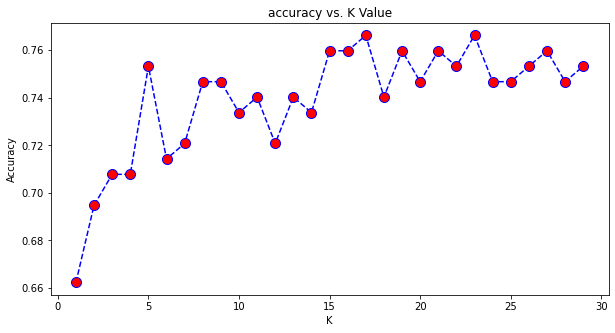

In [70]:
acc = []
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))